In [184]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [185]:
os.chdir('/home/melissa/PROJECT_DIRECTORIES/GRIN2B/scripts')
%run plotting.py

In [3]:
#load datasets
os.chdir('/home/melissa/RESULTS/GRIN2B/Power/REM/')
rem = pd.read_csv('REM_filtered_data_jan_23.csv')
os.chdir('/home/melissa/RESULTS/GRIN2B/Power/NREM/')
nrem = pd.read_csv('NREM_filtered_data_old_algo.csv')
os.chdir('/home/melissa/RESULTS/GRIN2B/Power/WAKE/harmonics_algo/test_5/het/')
wake_het = pd.read_csv('GRIN2B_het_animals_harmonics_algo.csv')
os.chdir('/home/melissa/RESULTS/GRIN2B/Power/WAKE/harmonics_algo/test_5/wt/')
wake_wt = pd.read_csv('GRIN2B_wt_animals_harmonics_algo.csv')
wake_concat = pd.concat([wake_het, wake_wt], axis = 0)

In [34]:
GRIN_het_IDs = ['131', '130', '129', '228', '227', '229', '373', '138', '137',
                '139','236', '237', '239', '241', '364', '367', '368', '424',
                '433']

GRIN_wt_IDs = ['132', '362', '363', '375', '378', '382', '383', '140', '238',
                '240', '365', '366', '369', '371', '401', '402', '404', '430']

br_animal_IDs = ['378', '382', '383', '401', '402', '404','424', '430','433',
                '140', '129', '130', '131', '132', '137','138', '139', '227',
                '228', '229', '236', '237', '238', '239', '240', '241', '362',
                '363', '364', '365', '366', '367', '368', '369', '371', '373', '375'] 

In [28]:
genotype = []
for animal_id in nrem['Animal_ID']:
    if str(animal_id) in GRIN_het_IDs:
        genotype.append('GRIN2B')
    else:
        genotype.append('WT')

nrem['Genotype'] = genotype

In [186]:
save_directory_test = '/home/melissa/RESULTS/GRIN2B/PAPER/PLOTS/Test'

# Wake

In [164]:
delta_wake = wake_concat[(wake_concat['Frequency'] >= 1) & (wake_concat['Frequency'] <= 5)]
theta_wake = wake_concat[(wake_concat['Frequency'] > 5) & (wake_concat['Frequency'] <= 10)]
sigma_wake = wake_concat[(wake_concat['Frequency'] > 10) & (wake_concat['Frequency'] <= 16)]
beta_wake = wake_concat[(wake_concat['Frequency'] > 16) & (wake_concat['Frequency'] <= 30)]
gamma_wake = wake_concat[(wake_concat['Frequency'] > 30) & (wake_concat['Frequency'] <= 48)]

In [165]:
channel_2_delta = delta_wake.loc[delta_wake['Channel'] == 2]
channel_2_theta = theta_wake.loc[theta_wake['Channel'] == 2]
channel_2_sigma = sigma_wake.loc[sigma_wake['Channel'] == 2]
channel_2_beta = beta_wake.loc[beta_wake['Channel'] == 2]
channel_2_gamma = gamma_wake.loc[gamma_wake['Channel'] == 2]

In [166]:
animal_averages = []
for animal in br_animal_IDs:
    animal_df_delta = channel_2_delta.loc[channel_2_delta['Animal_ID'] == int(animal)]
    power_average_delta = animal_df_delta['Power'].mean()
    delta_data = {'Animal_ID': [animal], 'Power': [power_average_delta], 'Frequency' : ['Delta'], 
            'Genotype': [animal_df_delta['Genotype'].iloc[0]]}
    delta_df = pd.DataFrame(data = delta_data)
    animal_averages.append(delta_df)
    animal_df_theta = channel_2_theta.loc[channel_2_theta['Animal_ID'] == int(animal)]
    power_average_theta = animal_df_theta['Power'].mean()
    theta_data = {'Animal_ID': [animal], 'Power': [power_average_theta], 'Frequency' : ['Theta'], 
            'Genotype': [animal_df_theta['Genotype'].iloc[0]]}
    theta_df = pd.DataFrame(data = theta_data)
    animal_averages.append(theta_df)
    animal_df_sigma = channel_2_sigma.loc[channel_2_sigma['Animal_ID'] == int(animal)]
    power_average_sigma = animal_df_sigma['Power'].mean()
    sigma_data = {'Animal_ID': [animal], 'Power': [power_average_sigma], 'Frequency' : ['Sigma'], 
            'Genotype': [animal_df_sigma['Genotype'].iloc[0]]}
    sigma_df = pd.DataFrame(data = sigma_data)
    animal_averages.append(sigma_df)
    animal_df_beta = channel_2_beta.loc[channel_2_beta['Animal_ID'] == int(animal)]
    power_average_beta = animal_df_beta['Power'].mean()
    beta_data = {'Animal_ID': [animal], 'Power': [power_average_beta], 'Frequency' : ['Beta'], 
            'Genotype': [animal_df_beta['Genotype'].iloc[0]]}
    beta_df = pd.DataFrame(data = beta_data)
    animal_averages.append(beta_df)
    animal_df_gamma = channel_2_gamma.loc[channel_2_gamma['Animal_ID'] == int(animal)]
    power_average_gamma = animal_df_gamma['Power'].mean()
    gamma_data = {'Animal_ID': [animal], 'Power': [power_average_gamma], 'Frequency' : ['Gamma'], 
            'Genotype': [animal_df_gamma['Genotype'].iloc[0]]}
    gamma_df = pd.DataFrame(data = gamma_data)
    animal_averages.append(gamma_df)

In [167]:
concat_df = pd.concat(animal_averages, axis = 0)

In [168]:
delta = concat_df.loc[concat_df['Frequency'] == 'Delta']
theta = concat_df.loc[concat_df['Frequency'] == 'Theta']
sigma = concat_df.loc[concat_df['Frequency'] == 'Sigma']
beta = concat_df.loc[concat_df['Frequency'] == 'Beta']
gamma = concat_df.loc[concat_df['Frequency'] == 'Gamma']

In [169]:
os.chdir('/home/melissa/RESULTS/GRIN2B/PAPER/STATS_DATASETS')
delta.to_csv('delta_wake.csv')
theta.to_csv('theta_wake.csv')
sigma.to_csv('sigma_wake.csv')
beta.to_csv('beta_wake.csv')
gamma.to_csv('gamma_wake.csv')

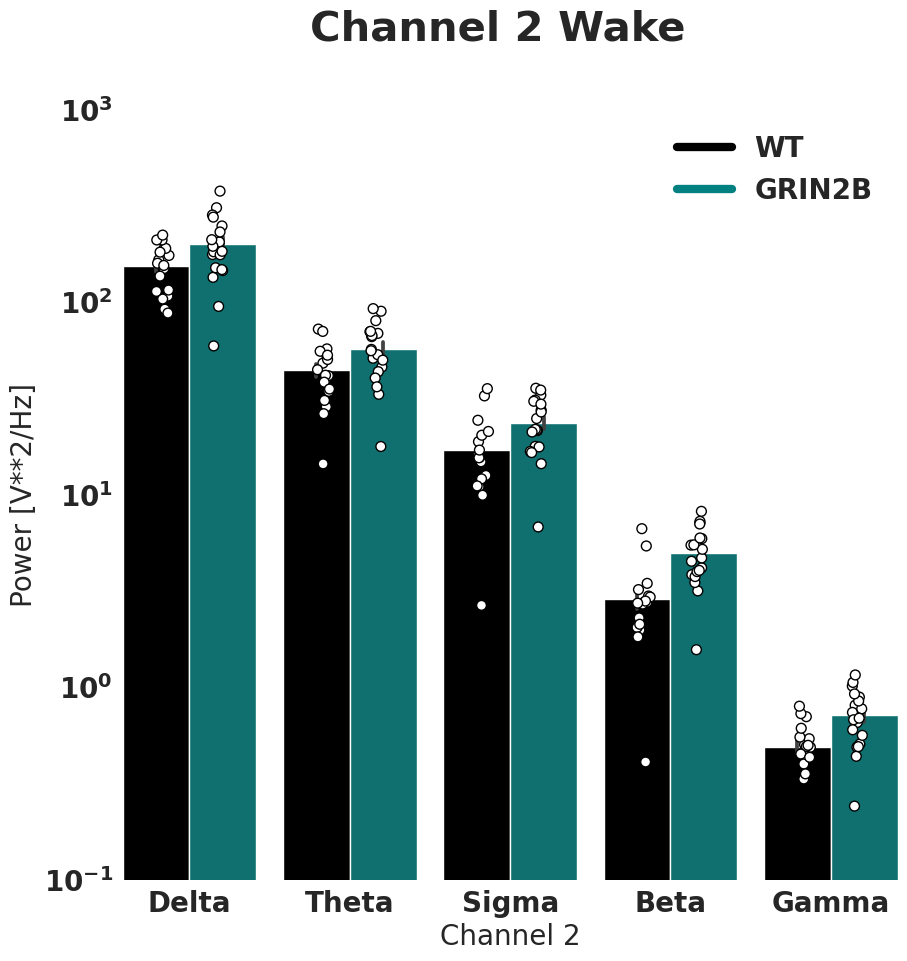

In [187]:
plotting = PlottingGRIN2B()
plotting.bar_and_strip_plots(delta, theta, sigma, beta, gamma, sleepstage = 'Wake', save_directory = save_directory_test)

# REM

In [170]:
save_directory = '/home/melissa/RESULTS/GRIN2B/PAPER/PLOTS/Bar_Plots'

In [188]:
delta_rem = rem[(rem['Frequency'] >= 1) & (rem['Frequency'] <= 5)]
theta_rem = rem[(rem['Frequency'] > 5) & (rem['Frequency'] <= 10)]
sigma_rem = rem[(rem['Frequency'] > 10) & (rem['Frequency'] <= 16)]
beta_rem = rem[(rem['Frequency'] > 16) & (rem['Frequency'] <= 30)]
gamma_rem = rem[(rem['Frequency'] > 30) & (rem['Frequency'] <= 48)]

In [189]:
channel_2_delta_rem = delta_rem.loc[delta_rem['Channel'] == 2]
channel_2_theta_rem = theta_rem.loc[theta_rem['Channel'] == 2]
channel_2_sigma_rem = sigma_rem.loc[sigma_rem['Channel'] == 2]
channel_2_beta_rem = beta_rem.loc[beta_rem['Channel'] == 2]
channel_2_gamma_rem = gamma_rem.loc[gamma_rem['Channel'] == 2]

In [190]:
animal_averages = []
for animal in br_animal_IDs:
    animal_df_delta = channel_2_delta_rem.loc[channel_2_delta_rem['Animal_ID'] == int(animal)]
    power_average_delta = animal_df_delta['Power'].mean()
    delta_data = {'Animal_ID': [animal], 'Power': [power_average_delta], 'Frequency' : ['Delta'], 
            'Genotype': [animal_df_delta['Genotype'].iloc[0]]}
    delta_df = pd.DataFrame(data = delta_data)
    animal_averages.append(delta_df)
    animal_df_theta = channel_2_theta_rem.loc[channel_2_theta_rem['Animal_ID'] == int(animal)]
    power_average_theta = animal_df_theta['Power'].mean()
    theta_data = {'Animal_ID': [animal], 'Power': [power_average_theta], 'Frequency' : ['Theta'], 
            'Genotype': [animal_df_theta['Genotype'].iloc[0]]}
    theta_df = pd.DataFrame(data = theta_data)
    animal_averages.append(theta_df)
    animal_df_sigma = channel_2_sigma_rem.loc[channel_2_sigma_rem['Animal_ID'] == int(animal)]
    power_average_sigma = animal_df_sigma['Power'].mean()
    sigma_data = {'Animal_ID': [animal], 'Power': [power_average_sigma], 'Frequency' : ['Sigma'], 
            'Genotype': [animal_df_sigma['Genotype'].iloc[0]]}
    sigma_df = pd.DataFrame(data = sigma_data)
    animal_averages.append(sigma_df)
    animal_df_beta = channel_2_beta_rem.loc[channel_2_beta_rem['Animal_ID'] == int(animal)]
    power_average_beta = animal_df_beta['Power'].mean()
    beta_data = {'Animal_ID': [animal], 'Power': [power_average_beta], 'Frequency' : ['Beta'], 
            'Genotype': [animal_df_beta['Genotype'].iloc[0]]}
    beta_df = pd.DataFrame(data = beta_data)
    animal_averages.append(beta_df)
    animal_df_gamma = channel_2_gamma_rem.loc[channel_2_gamma_rem['Animal_ID'] == int(animal)]
    power_average_gamma = animal_df_gamma['Power'].mean()
    gamma_data = {'Animal_ID': [animal], 'Power': [power_average_gamma], 'Frequency' : ['Gamma'], 
            'Genotype': [animal_df_gamma['Genotype'].iloc[0]]}
    gamma_df = pd.DataFrame(data = gamma_data)
    animal_averages.append(gamma_df)

In [191]:
concat_df = pd.concat(animal_averages, axis = 0)

In [192]:
delta = concat_df.loc[concat_df['Frequency'] == 'Delta']
theta = concat_df.loc[concat_df['Frequency'] == 'Theta']
sigma = concat_df.loc[concat_df['Frequency'] == 'Sigma']
beta = concat_df.loc[concat_df['Frequency'] == 'Beta']
gamma = concat_df.loc[concat_df['Frequency'] == 'Gamma']

In [193]:
os.chdir('/home/melissa/RESULTS/GRIN2B/PAPER/STATS_DATASETS')
delta.to_csv('delta_rem.csv')
theta.to_csv('theta_rem.csv')
sigma.to_csv('sigma_rem.csv')
beta.to_csv('beta_rem.csv')
gamma.to_csv('gamma_rem.csv')

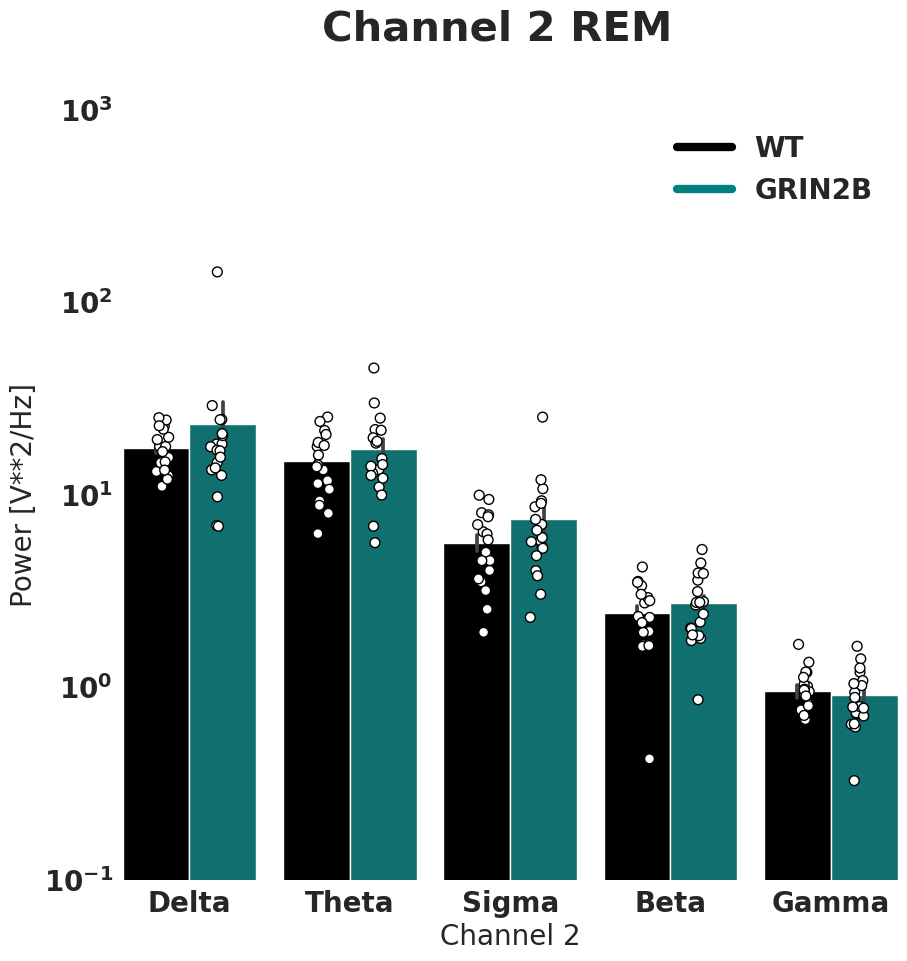

In [194]:
plotting = PlottingGRIN2B()
plotting.bar_and_strip_plots(delta, theta, sigma, beta, gamma, sleepstage = 'REM', save_directory = save_directory_test)

# NREM

In [195]:
delta_nrem = nrem[(nrem['Frequency'] >= 1) & (nrem['Frequency'] <= 5)]
theta_nrem = nrem[(nrem['Frequency'] > 5) & (nrem['Frequency'] <= 10)]
sigma_nrem = nrem[(nrem['Frequency'] > 10) & (nrem['Frequency'] <= 16)]
beta_nrem = nrem[(nrem['Frequency'] > 16) & (nrem['Frequency'] <= 30)]
gamma_nrem = nrem[(nrem['Frequency'] > 30) & (nrem['Frequency'] <= 48)]

In [196]:
channel_2_delta_nrem = delta_nrem.loc[delta_nrem['Channel'] == 2]
channel_2_theta_nrem = theta_nrem.loc[theta_nrem['Channel'] == 2]
channel_2_sigma_nrem = sigma_nrem.loc[sigma_nrem['Channel'] == 2]
channel_2_beta_nrem = beta_nrem.loc[beta_nrem['Channel'] == 2]
channel_2_gamma_nrem = gamma_nrem.loc[gamma_nrem['Channel'] == 2]

In [197]:
animal_averages = []
for animal in br_animal_IDs:
    animal_df_delta = channel_2_delta_nrem.loc[channel_2_delta_nrem['Animal_ID'] == int(animal)]
    power_average_delta = animal_df_delta['Power'].mean()
    delta_data = {'Animal_ID': [animal], 'Power': [power_average_delta], 'Frequency' : ['Delta'], 
            'Genotype': [animal_df_delta['Genotype'].iloc[0]]}
    delta_df = pd.DataFrame(data = delta_data)
    animal_averages.append(delta_df)
    animal_df_theta = channel_2_theta_nrem.loc[channel_2_theta_nrem['Animal_ID'] == int(animal)]
    power_average_theta = animal_df_theta['Power'].mean()
    theta_data = {'Animal_ID': [animal], 'Power': [power_average_theta], 'Frequency' : ['Theta'], 
            'Genotype': [animal_df_theta['Genotype'].iloc[0]]}
    theta_df = pd.DataFrame(data = theta_data)
    animal_averages.append(theta_df)
    animal_df_sigma = channel_2_sigma_nrem.loc[channel_2_sigma_nrem['Animal_ID'] == int(animal)]
    power_average_sigma = animal_df_sigma['Power'].mean()
    sigma_data = {'Animal_ID': [animal], 'Power': [power_average_sigma], 'Frequency' : ['Sigma'], 
            'Genotype': [animal_df_sigma['Genotype'].iloc[0]]}
    sigma_df = pd.DataFrame(data = sigma_data)
    animal_averages.append(sigma_df)
    animal_df_beta = channel_2_beta_nrem.loc[channel_2_beta_nrem['Animal_ID'] == int(animal)]
    power_average_beta = animal_df_beta['Power'].mean()
    beta_data = {'Animal_ID': [animal], 'Power': [power_average_beta], 'Frequency' : ['Beta'], 
            'Genotype': [animal_df_beta['Genotype'].iloc[0]]}
    beta_df = pd.DataFrame(data = beta_data)
    animal_averages.append(beta_df)
    animal_df_gamma = channel_2_gamma_nrem.loc[channel_2_gamma_nrem['Animal_ID'] == int(animal)]
    power_average_gamma = animal_df_gamma['Power'].mean()
    gamma_data = {'Animal_ID': [animal], 'Power': [power_average_gamma], 'Frequency' : ['Gamma'], 
            'Genotype': [animal_df_gamma['Genotype'].iloc[0]]}
    gamma_df = pd.DataFrame(data = gamma_data)
    animal_averages.append(gamma_df)

In [198]:
concat_df = pd.concat(animal_averages, axis = 0)

In [199]:
delta = concat_df.loc[concat_df['Frequency'] == 'Delta']
theta = concat_df.loc[concat_df['Frequency'] == 'Theta']
sigma = concat_df.loc[concat_df['Frequency'] == 'Sigma']
beta = concat_df.loc[concat_df['Frequency'] == 'Beta']
gamma = concat_df.loc[concat_df['Frequency'] == 'Gamma']

In [200]:
os.chdir('/home/melissa/RESULTS/GRIN2B/PAPER/STATS_DATASETS')
delta.to_csv('delta_nrem.csv')
theta.to_csv('theta_nrem.csv')
sigma.to_csv('sigma_nrem.csv')
beta.to_csv('beta_nrem.csv')
gamma.to_csv('gamma_nrem.csv')

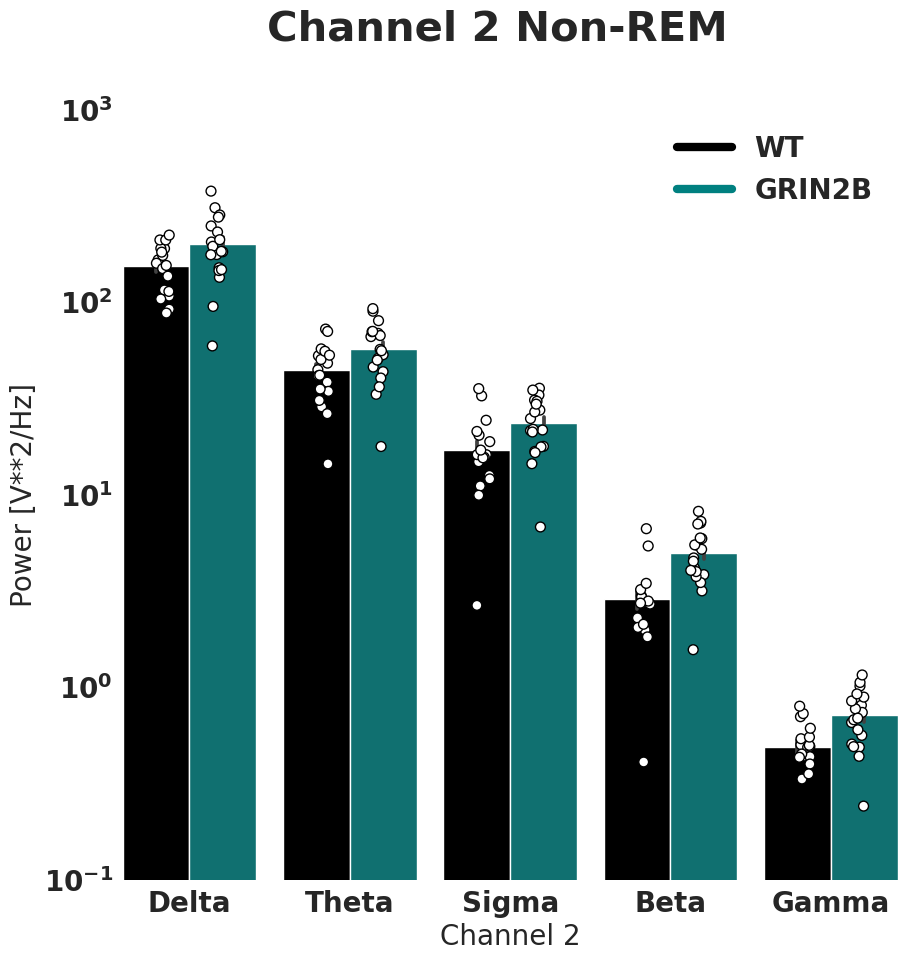

In [201]:
plotting = PlottingGRIN2B()
plotting.bar_and_strip_plots(delta, theta, sigma, beta, gamma, sleepstage = 'Non-REM', save_directory = save_directory_test)